<div align="center">

# COVID19 Analysis  with DASH
    
</div>



<br>

### Importing Libraries

In [40]:
#basic
import pandas as pd
import numpy as np

#read enconding
import chardet

#Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#dash
import dash
from dash import Input, Output, callback, html, dcc

from datetime import date
import webbrowser

<br>

## Fetching Data

### About Dataset
<br>
<br>

Using the following data from www.ecdc.europa.eu/:

 * Historical data (to 20 June 2022) on the weekly number of new reported COVID-19 cases and deaths worldwide


In [2]:
#to detecet encoding and read from a csv file in the local computer


path='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'


#read
data = pd.read_csv(path)

data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


<br>


### Get Familiar with the Data

In [3]:
data.shape

(61900, 12)

In [4]:
data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [5]:
data.describe(include='all')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900,61625,61777,6.177700e+04,61900,59021.000000
unique,350,NaN,NaN,NaN,NaN,NaN,214,213,212,NaN,6,NaN
top,18/11/2020,NaN,NaN,NaN,NaN,NaN,South_Korea,SG,KOR,NaN,Europe,NaN
freq,213,NaN,NaN,NaN,NaN,NaN,350,350,350,NaN,17372,NaN
mean,NaN,15.628934,7.067157,2019.998918,1155.147237,26.055460,NaN,NaN,NaN,4.098770e+07,NaN,66.320586
std,NaN,8.841582,2.954776,0.032882,6779.224479,131.227055,NaN,NaN,NaN,1.531294e+08,NaN,162.329240
min,NaN,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,NaN,NaN,NaN,8.150000e+02,NaN,-147.419587
25%,NaN,8.000000,5.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,1.293120e+06,NaN,0.757526
50%,NaN,15.000000,7.000000,2020.000000,15.000000,0.000000,NaN,NaN,NaN,7.169456e+06,NaN,6.724045
75%,NaN,23.000000,10.000000,2020.000000,273.000000,4.000000,NaN,NaN,NaN,2.851583e+07,NaN,52.572719


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

<br>


### Cleaning Data

**Rename columns**

In [7]:
#Rename columns
data.columns


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [8]:
data.rename(columns={'dateRep':'date', 'countriesAndTerritories':'country', 'countryterritoryCode':'code',
       'popData2019':'population', 'continentExp':'continent',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'cumulative_cases'}, inplace=True)

data.head()

,date,day,month,year,cases,deaths,country,geoId,code,population,continent,cumulative_cases
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


---

**Set time format**

In [9]:
# Original format time is %d/%m/%Y
# If we convert to datetime64[ns] directly we can found some problems having the day first as: misunderstanding, change m by d, etc.
# So, first we will invert the order using a function
# The dateutil parser generally expects the date format to be in the order of year, month, and day.
# To handle this date format, you can use the dayfirst parameter of the dateutil.parser.parse function. 
# The strftime() method returns a string representing date and time using date, time or datetime object.


from dateutil import parser

def correct_date_format(date_obj):
    try:
        parsed_date = parser.parse(date_obj, dayfirst=True)
        return parsed_date.strftime('%Y-%m-%d')
    except ValueError:
        return None
    
data['date'] = data['date'].apply(correct_date_format)


In [10]:
# convert date object to datetime type
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61900 non-null  datetime64[ns]
 1   day               61900 non-null  int64         
 2   month             61900 non-null  int64         
 3   year              61900 non-null  int64         
 4   cases             61900 non-null  int64         
 5   deaths            61900 non-null  int64         
 6   country           61900 non-null  object        
 7   geoId             61625 non-null  object        
 8   code              61777 non-null  object        
 9   population        61777 non-null  float64       
 10  continent         61900 non-null  object        
 11  cumulative_cases  59021 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 5.7+ MB


----



**Check columns with  null values**

In [11]:
# Columns with null values are geoID, code, population, cumulative_Cases
####Check first geoID



In [12]:
data[data['geoId'].isnull()]


,date,day,month,year,cases,deaths,country,geoId,code,population,continent,cumulative_cases
39566,2020-12-14,14,12,2020,267,0,Namibia,NaN,NAM,2494524.0,Africa,87.832388
39567,2020-12-13,13,12,2020,172,0,Namibia,NaN,NAM,2494524.0,Africa,79.534212
39568,2020-12-12,12,12,2020,324,2,Namibia,NaN,NAM,2494524.0,Africa,75.765958
39569,2020-12-11,11,12,2020,301,3,Namibia,NaN,NAM,2494524.0,Africa,64.862074
39570,2020-12-10,10,12,2020,174,2,Namibia,NaN,NAM,2494524.0,Africa,58.768727
...,...,...,...,...,...,...,...,...,...,...,...,...
39836,2020-03-19,19,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
39837,2020-03-18,18,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
39838,2020-03-17,17,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
39839,2020-03-16,16,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN


In [13]:
# copy the code as geoID where geoID is nan
data_clean = data.copy()
data_clean['geoId'].fillna(data['code'], inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61900 non-null  datetime64[ns]
 1   day               61900 non-null  int64         
 2   month             61900 non-null  int64         
 3   year              61900 non-null  int64         
 4   cases             61900 non-null  int64         
 5   deaths            61900 non-null  int64         
 6   country           61900 non-null  object        
 7   geoId             61900 non-null  object        
 8   code              61777 non-null  object        
 9   population        61777 non-null  float64       
 10  continent         61900 non-null  object        
 11  cumulative_cases  59021 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 5.7+ MB


In [14]:
# check code column
data_clean[data_clean['code'].isnull()]['country'].unique()

array(['Cases_on_an_international_conveyance_Japan', 'Wallis_and_Futuna'],
      dtype=object)

In [15]:
#same as before, copy geoID were code is null
data_clean['code'].fillna(data['geoId'], inplace=True)
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61900 non-null  datetime64[ns]
 1   day               61900 non-null  int64         
 2   month             61900 non-null  int64         
 3   year              61900 non-null  int64         
 4   cases             61900 non-null  int64         
 5   deaths            61900 non-null  int64         
 6   country           61900 non-null  object        
 7   geoId             61900 non-null  object        
 8   code              61900 non-null  object        
 9   population        61777 non-null  float64       
 10  continent         61900 non-null  object        
 11  cumulative_cases  59021 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 5.7+ MB


In [16]:
#check population column
data_clean[data_clean['population'].isnull()]

,date,day,month,year,cases,deaths,country,geoId,code,population,continent,cumulative_cases
10935,2020-03-10,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,JPG11668,NaN,Other,NaN
10936,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,JPG11668,NaN,Other,NaN
10937,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,JPG11668,NaN,Other,NaN
10938,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,JPG11668,NaN,Other,NaN
10939,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,JPG11668,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60873,2020-10-21,21,10,2020,0,0,Wallis_and_Futuna,WF,WF,NaN,Oceania,NaN
60874,2020-10-20,20,10,2020,0,0,Wallis_and_Futuna,WF,WF,NaN,Oceania,NaN
60875,2020-10-19,19,10,2020,0,0,Wallis_and_Futuna,WF,WF,NaN,Oceania,NaN
60876,2020-10-18,18,10,2020,0,0,Wallis_and_Futuna,WF,WF,NaN,Oceania,NaN


In [17]:
JPG=len(data_clean[data_clean['country']=='Cases_on_an_international_conveyance_Japan'])

WF=len(data_clean[data_clean['country']=='Wallis_and_Futuna'])

total=JPG+WF

total

123

In [18]:
len(data_clean[(data_clean['cumulative_cases'].isnull()) & 
           ((data_clean['country']=='Cases_on_an_international_conveyance_Japan')  | 
            (data_clean['country']=='Wallis_and_Futuna'))])


123

In [19]:
# all the "Cases_on_an_international_conveyance_Japan" and "Wallis_and_Futuna" have empty the population and also the cumulative cases
# so the decision is remove this rows
# Eliminar las filas donde 'country' es igual a 'Wallis_and_Futuna' o 'Cases_on_an_international_conveyance_Japan'
data_clean=data_clean[~((data_clean['country'] == 'Wallis_and_Futuna') | (data_clean['country'] == 'Cases_on_an_international_conveyance_Japan'))]
data_clean['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fal

In [20]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61777 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61777 non-null  datetime64[ns]
 1   day               61777 non-null  int64         
 2   month             61777 non-null  int64         
 3   year              61777 non-null  int64         
 4   cases             61777 non-null  int64         
 5   deaths            61777 non-null  int64         
 6   country           61777 non-null  object        
 7   geoId             61777 non-null  object        
 8   code              61777 non-null  object        
 9   population        61777 non-null  float64       
 10  continent         61777 non-null  object        
 11  cumulative_cases  59021 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 6.1+ MB


In [21]:
#check the cumulative_cases column
a=len(data_clean[data_clean['cumulative_cases'].isnull()]['country'].unique())
b=len(data_clean['country'].unique())

print('Number of unique countries:', a)
print('Number of unique countries with NAN', b)

Number of unique countries: 212
Number of unique countries with NAN 212


In [22]:
# All the countries have null values.

data_clean.describe(datetime_is_numeric=True)

,date,day,month,year,cases,deaths,population,cumulative_cases
count,61777,61777.000000,61777.000000,61777.000000,61777.000000,61777.000000,6.177700e+04,59021.000000
mean,2020-07-17 20:31:26.915842816,15.629215,7.068958,2019.998932,1157.435858,26.107224,4.098770e+07,66.320586
min,2019-12-31 00:00:00,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,2020-05-07 00:00:00,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,2020-07-20 00:00:00,15.000000,7.000000,2020.000000,16.000000,0.000000,7.169456e+06,6.724045
75%,2020-10-02 00:00:00,23.000000,10.000000,2020.000000,276.000000,4.000000,2.851583e+07,52.572719
max,2020-12-14 00:00:00,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210
std,NaN,8.841298,2.949788,0.032669,6785.775773,131.352497,1.531294e+08,162.329240


In [23]:
#not all the countries start with the min value of the date
len(data_clean[data_clean['date']=='2019-12-31'])


66

In [24]:
###STRATEGY
# 1. Sort the values by country and date in ascending 
# 2. fill the nan in the cumulative_cases with the forward value. 
# 3. fill with 0, the rest of nan values. So, firsts days with nan (assuming not registration) will be 0. 

# Sort by country and date
data_clean.sort_values(by=['country', 'date'], inplace=True)
data_clean.head()

# fill NaN in cumulative_cases  with the value of the forward one
data_clean['cumulative_cases'].fillna(method='ffill', inplace=True)

# fill NaN with 0 in first days (no registration)
data_clean['cumulative_cases'].fillna(0, inplace=True)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61777 entries, 339 to 61631
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61777 non-null  datetime64[ns]
 1   day               61777 non-null  int64         
 2   month             61777 non-null  int64         
 3   year              61777 non-null  int64         
 4   cases             61777 non-null  int64         
 5   deaths            61777 non-null  int64         
 6   country           61777 non-null  object        
 7   geoId             61777 non-null  object        
 8   code              61777 non-null  object        
 9   population        61777 non-null  float64       
 10  continent         61777 non-null  object        
 11  cumulative_cases  61777 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 6.1+ MB


----

**Rename columns**

In [25]:
#change country names. Some are too long  
data_clean['country'].replace({'Antigua_and_Barbuda': 'Ag_&_Barbuda' ,
                              'Bosnia_and_Herzegovina':'Bosnia',
                              'British_Virgin_Islands': 'Virgin_ISl_UK',
                              'Democratic_Republic_of_the_Congo':'Congo',
                              'Central_African_Republic':'Central African',
                              'Falkland_Islands_(Malvinas)':'Malvinas',
                              'French_Polynesia':'Polynesia',
                              'Northern_Mariana_Islands': 'Mariana_ISL',
                              'North_Macedonia': 'Macedonia',
                              'Saint_Kitts_and_Nevis':'St. Kitts ',
                              'Saint_Vincent_and_the_Grenadines': 'St. Vincent',
                              'Sao_Tome_and_Principe':'Sao_Tome',
                              'Turks_and_Caicos_islands': 'Caicos',
                              'United_Republic_of_Tanzania': 'Tanzania',
                              'United_Arab_Emirates':'Emirates',
                              'United_States_of_America': 'USA',
                              'United_States_Virgin_Islands': 'Virgin_ISl_US'}, 
                              inplace=True)

data_clean['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Ag_&_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia', 'Botswana',
       'Brazil', 'Virgin_ISl_UK', 'Brunei_Darussalam', 'Bulgaria',
       'Burkina_Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape_Verde', 'Cayman_Islands', 'Central African', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa_Rica',
       'Cote_dIvoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador',
       'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Malvinas', 'Faroe_Islands', 'Fiji',
       'Finland', 'France', 'Polynesia', 'Gabon', 'Gambia'


---

**Negative cases**

In [26]:
#should not have values <0 for cumulative cases, deaths and cases
data_clean.describe()

,day,month,year,cases,deaths,population,cumulative_cases
count,61777.000000,61777.000000,61777.000000,61777.000000,61777.000000,6.177700e+04,61777.000000
mean,15.629215,7.068958,2019.998932,1157.435858,26.107224,4.098770e+07,71.773824
std,8.841298,2.949788,0.032669,6785.775773,131.352497,1.531294e+08,171.981421
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.821887
50%,15.000000,7.000000,2020.000000,16.000000,0.000000,7.169456e+06,7.123518
75%,23.000000,10.000000,2020.000000,276.000000,4.000000,2.851583e+07,57.373843
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [27]:
print('There are', len(data_clean[data_clean['cases']<0]), 'cases values less than 0.')
print('There are', len(data_clean[data_clean['deaths']<0]), 'deaths values less than 0.')
print('There are', len(data_clean[data_clean['cumulative_cases']<0]), 'cumulative cases values less than 0.')


There are 17 cases values less than 0.
There are 8 deaths values less than 0.
There are 40 cumulative cases values less than 0.


In [28]:
#only 3 countries with cumulative cases <0
data_clean[data_clean['cumulative_cases']<0]['country'].unique()

array(['Benin', 'Jordan', 'Luxembourg'], dtype=object)

In [29]:
data_clean[data_clean['cumulative_cases']<0]

,date,day,month,year,cases,deaths,country,geoId,code,population,continent,cumulative_cases
6309,2020-05-22,22,5,2020,5,1,Benin,BJ,BEN,11801151.0,Africa,-0.042369
6308,2020-05-23,23,5,2020,0,0,Benin,BJ,BEN,11801151.0,Africa,-0.906691
6307,2020-05-24,24,5,2020,0,0,Benin,BJ,BEN,11801151.0,Africa,-1.262589
6306,2020-05-25,25,5,2020,56,0,Benin,BJ,BEN,11801151.0,Africa,-1.084640
6305,2020-05-26,26,5,2020,0,0,Benin,BJ,BEN,11801151.0,Africa,-1.084640
6304,2020-05-27,27,5,2020,17,0,Benin,BJ,BEN,11801151.0,Africa,-1.008376
6303,2020-05-28,28,5,2020,2,0,Benin,BJ,BEN,11801151.0,Africa,-0.991429
6302,2020-05-29,29,5,2020,0,0,Benin,BJ,BEN,11801151.0,Africa,-1.093114
6301,2020-05-30,30,5,2020,14,0,Benin,BJ,BEN,11801151.0,Africa,-0.974481
6300,2020-05-31,31,5,2020,8,0,Benin,BJ,BEN,11801151.0,Africa,-0.906691


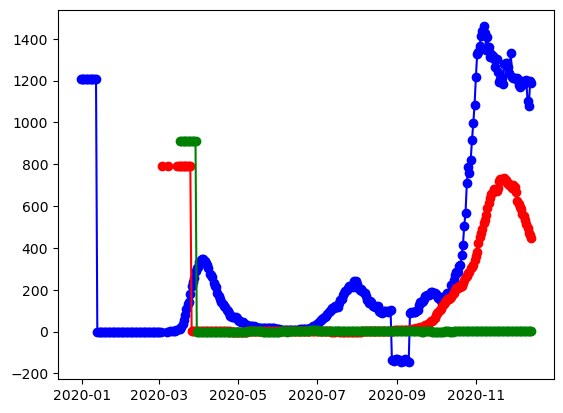

In [30]:
data_lux=data_clean[data_clean['country']=='Luxembourg']
data_Jor=data_clean[data_clean['country']=='Jordan']
data_benin=data_clean[data_clean['country']=='Benin']

plt.plot(data_lux['date'], data_lux['cumulative_cases'], label='Luxembourg', marker='o', linestyle='-', color='b')
plt.plot(data_Jor['date'], data_Jor['cumulative_cases'], label='Jordan', marker='o', linestyle='-', color='r')
plt.plot(data_benin['date'], data_benin['cumulative_cases'], label='Benin', marker='o', linestyle='-', color='g')


There are  0 cumulative cases with negative value.


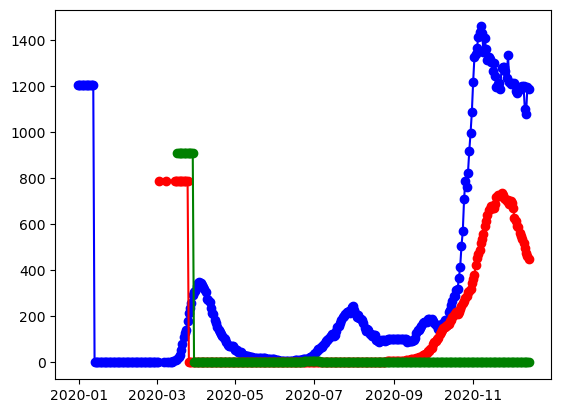

In [31]:
#For Benin, change cumulative_cases <0 to 0
#For Jordan, change cumulative_cases <0 to 0, 
#For Luxembourg, tere are a mistake and the negative values will be positives


## Replace negative function
replace_negatives = lambda x: 0 if x < 0 else x


### Benin & Jordan

mask = data_clean['country'].isin(['Benin', 'Jordan'])
data_clean.loc[mask, ['cumulative_cases']] = data_clean.loc[mask, ['cumulative_cases']].applymap(replace_negatives)


### Luxembourg
mask_luxembourg = data_clean['country'] == 'Luxembourg'
data_clean.loc[mask_luxembourg, 'cumulative_cases'] = data_clean.loc[mask_luxembourg, 'cumulative_cases'].apply(lambda x: x if x >= 0 else None).ffill()


##check
print('There are ', len(data_clean[data_clean['cumulative_cases']<0]), 'cumulative cases with negative value.' )


## visualizate

data_lux2=data_clean[data_clean['country']=='Luxembourg']
data_Jor2=data_clean[data_clean['country']=='Jordan']
data_benin2=data_clean[data_clean['country']=='Benin']

plt.plot(data_lux2['date'], data_lux2['cumulative_cases'], label='Luxembourg', marker='o', linestyle='-', color='b')
plt.plot(data_Jor2['date'], data_Jor2['cumulative_cases'], label='Jordan', marker='o', linestyle='-', color='r')
plt.plot(data_benin2['date'], data_benin2['cumulative_cases'], label='Benin', marker='o', linestyle='-', color='g')

In [32]:
# deaths should be as minimun 0
data_clean['deaths'] = data_clean['deaths'].apply(replace_negatives)
data_clean.describe()

,day,month,year,cases,deaths,population,cumulative_cases
count,61777.000000,61777.000000,61777.000000,61777.000000,61777.000000,6.177700e+04,61777.000000
mean,15.629215,7.068958,2019.998932,1157.435858,26.146317,4.098770e+07,71.828272
std,8.841298,2.949788,0.032669,6785.775773,131.105649,1.531294e+08,171.953205
min,1.000000,1.000000,2019.000000,-8261.000000,0.000000,8.150000e+02,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.823058
50%,15.000000,7.000000,2020.000000,16.000000,0.000000,7.169456e+06,7.142730
75%,23.000000,10.000000,2020.000000,276.000000,4.000000,2.851583e+07,57.463890
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [33]:
## cases should be positive, 
## if a value in cases is <0, the new value should be cumulative case - previous cumulative for the same country
data_clean.sort_values(by=['country', 'date'], inplace=True)

mask_negative_cases = data_clean['cases'] < 0
difference = data_clean['cumulative_cases'] - data_clean['cumulative_cases'].shift(1)

data_clean.loc[mask_negative_cases, 'cases'] = difference.where(difference >= 0, 0)

len(data_clean[data_clean['cases']<0])

0

In [34]:
data_clean.describe()

,day,month,year,cases,deaths,population,cumulative_cases
count,61777.000000,61777.000000,61777.000000,61777.000000,61777.000000,6.177700e+04,61777.000000
mean,15.629215,7.068958,2019.998932,1157.700552,26.146317,4.098770e+07,71.828272
std,8.841298,2.949788,0.032669,6785.635468,131.105649,1.531294e+08,171.953205
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.823058
50%,15.000000,7.000000,2020.000000,16.000000,0.000000,7.169456e+06,7.142730
75%,23.000000,10.000000,2020.000000,276.000000,4.000000,2.851583e+07,57.463890
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


<br>

## Practicing Dash

**ONE INPUT**

In [35]:
app=dash.Dash()

app.layout= html.Div(children= [html.H1('COVID19 in the World', style={'textAlign':'center', 'color':'black', 'font-size':30}),
                                
                                html.Div(['Country:', dcc.Input(id='country', value='Spain', type='text', style={'height':'30px', 'font-size':15})],
                                        style={'font-size':20}),
                                
                                html.Br(),
                                html.Br(),
                                
                                html.Div(dcc.Graph(id='line-plot')),
                               ])

@app.callback(
    Output(component_id='line-plot', component_property='figure'),
    Input(component_id='country', component_property='value')
    )


def get_graph(entered_country):
    
    # Select data
    df = data_clean[data_clean['country'] == str(entered_country)]

    # Plot the graph
    fig1 = px.line(df, x='date', y='cumulative_cases', 
                   title='Cumulative COVID19 cases in ' + str(entered_country) + ' in 2020.')
    
    fig1.update_xaxes(title_text='Date')
    fig1.update_yaxes(title_text='COVID19 Cumulative Cases')
    
    fig1.update_layout()

    return fig1


if __name__ == '__main__':
    app.run_server(port=8002, host='127.0.0.1', debug=True)


**TWO INPUTS**

In [1]:
app=dash.Dash()

app.layout= html.Div(children= [html.H1('COVID19 in the World in 2020', style={'textAlign':'center', 'color':'black', 'font-size':40}),
                                
                                html.Div(['Top #    :', dcc.Input(id='top', value='10', type='number', style={'height':'30px', 'font-size':15})],
                                        style={'font-size':20}),
                                
                                html.Div (['Month: ', dcc.Input(id= 'month', value='1', type='number', style= {'height': '30px', 'font-size': 15})], 
                                          style= {'font-size': 20}),

                                
                                html.Br(),
                                html.Br(),
                                
                                html.Div(dcc.Graph(id='bar-plot')),
                               ])

@app.callback(
    Output(component_id='bar-plot', component_property='figure'),
    [Input(component_id='top', component_property='value'),
     Input(component_id='month', component_property='value')]
    )


def get_graph(entered_top, entered_month):
    
    # Select data
    datam2020=data_clean[(data_clean['year']!=2019) & (data_clean['month']==int(entered_month)) ]
    
    #top10 by month
    df = datam2020.groupby('country')['cases'].sum().nlargest(int(entered_top)).reset_index()
    
    
    # Plot the graph
    fig1 = px.bar(df, x='country', y='cases', 
                   title='Top'+str(entered_top)+' countries for COVID19 cases in month ' + str(entered_month) + ' of 2020')
    fig1.update_layout()

    fig1.update_xaxes(title_text='Country')
    fig1.update_yaxes(title_text='COVID19 Cases')
    
    return fig1


if __name__ == '__main__':
    app.run_server(port=8002, host='127.0.0.2', debug=True)




NameError: name 'dash' is not defined

<br>

**SEVERAL GRAPHS**

In [44]:
#Create a dash application
app = dash.Dash(__name__)


# Build dash app layout
app.layout = html.Div(children=[ html.H1('Covid19 World Statistics', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 30}),
                                
                                html.Div(["Top # : ", dcc.Input(id='top', value='10', 
                                type='number', style={'height':'30px', 'font-size': 15}),], 
                                style={'font-size': 20}),
                                
                                html.Br(),
                                html.Br(), 
                                
                                # Segment 1
                                html.Div(dcc.Graph(id='line-cumulative'), style={}),
                                
                                # Segment 2
                                html.Div([
                                        html.Div(dcc.Graph(id='line-cases')),
                                        html.Div(dcc.Graph(id='line-death'))
                                ], style={'display': 'flex'}),
                                
                                
                                html.Br(),
                                html.Br(), 
                                
                                
                                html.Div (['Month: ', dcc.Input(id= 'month', value='12', 
                                type='number', style= {'height': '30px', 'font-size': 15})], 
                                style= {'font-size': 20}),
                                
                                
                                # Segment 3
                                html.Div([
                                        html.Div(dcc.Graph(id='bar-cases')),
                                        html.Div(dcc.Graph(id='bar-death'))
                                ], style={'display': 'flex'}),
                                
                               
                               ])

                                

#select and calculate data
def compute_info(top_number, month_number):
    
    # Select data
    df = data_clean[data_clean['year']!=2019]
    df_month=df[df['month']==int(month_number)]
    
    # Compute for line graphs
    top_cum_country = df.groupby(['country'])['cumulative_cases'].max().nlargest(int(top_number)).reset_index()
    top_cum_country_list = list(top_cum_country['country'].unique())
    max_cum_line = df[df['country'].isin(top_cum_country_list)]
    
    top_cases_country = df.groupby(['country'])['cases'].max().nlargest(int(top_number)).reset_index()
    top_cases_list = list(top_cases_country['country'].unique())
    max_cases_line = df[df['country'].isin(top_cases_list)]
    
    top_death_country = df.groupby(['country'])['deaths'].max().nlargest(int(top_number)).reset_index()
    top_death_list = list(top_cases_country['country'].unique())
    max_death_line = df[df['country'].isin(top_death_list)]
    
    # Compute for bar graphs
    max_cases_month = df_month.groupby(['country'])['cases'].sum().nlargest(int(top_number)).reset_index()
    max_death_month = df_month.groupby(['country'])['deaths'].sum().nlargest(int(top_number)).reset_index()
    

    
    return max_cum_line, max_cases_line, max_death_line, max_cases_month, max_death_month

                                
                                
# Callback decorator
@app.callback( [
               Output(component_id='line-cumulative', component_property='figure'),
               Output(component_id='line-cases', component_property='figure'),
               Output(component_id='line-death', component_property='figure'),
               Output(component_id='bar-cases', component_property='figure'),
               Output(component_id='bar-death', component_property='figure')
               ],
               [Input(component_id='top', component_property='value'),
                Input(component_id='month', component_property='value')]
             )


# Computation to callback function and return graph
def get_graph(top_number, month_number):
    
    # Compute required information for creating graph from the data
    max_cum_line, max_cases_line, max_death_line, max_cases_month, max_death_month= compute_info(top_number, month_number)
            
    # Line plot for top 10 countries with max cumulative cases in 2020 
    max_cum_line_fig = px.line(max_cum_line, x='date', y='cumulative_cases', color='country', title='Top countries with more cumulative COVID19 cases in 2020')
    
    #Line plot for top 10 countries with max deaths in 2020
    max_cases_line_fig = px.line(max_cases_line, x='date', y='cases', color='country', title='Top countries with more COVID19 cases in 2020' )
    
    # Line plot for top 10 countries with max cases in 2020
    max_death_line_fig = px.line(max_death_line, x='date', y='deaths', color='country', title='Top countries with more deaths due to COVID19 in 2020')
    
    # bar plot selecting moth for cases top
    max_cases_month_fig = px.bar(max_cases_month, x='country', y='cases', color='country', title='Top Countries with more COVID19 cases in month '+str(month_number) +' of 2020')
    
    # bar plot selecting moth for deaths top
    max_death_month_fig = px.bar(max_death_month, x='country', y='deaths', color='country', title='Top Countries with more COVID19 deaths in month '+str(month_number) +' of 2020')
            
    
    return[max_cum_line_fig, max_cases_line_fig, max_death_line_fig, max_cases_month_fig, max_death_month_fig ]

                                
                                
# Run the app

if __name__ == '__main__':
    app.run_server(port=8002, host='127.0.0.3', debug=True)
    webbrowser.open_new('http://127.0.0.3:8050')

<br>

# Author

<a>Eva Villar Álvarez</a>

2024/01/11

<br>
